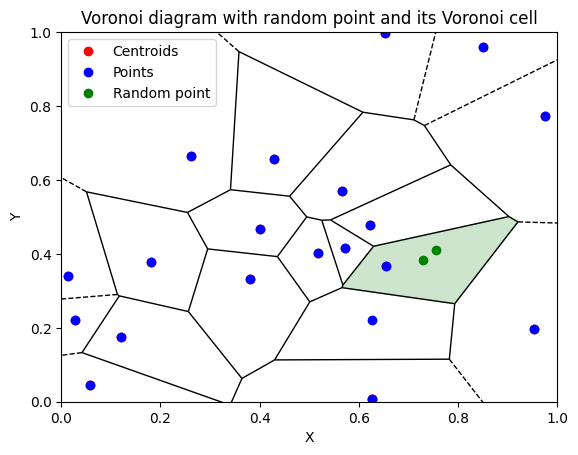

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Generate a set of random points
points = np.random.rand(20, 2)

# Compute the Voronoi diagram
vor = Voronoi(points)

# Generate a random point in one of the Voronoi cells
cell_index = np.random.randint(0, len(vor.point_region))
random_point = np.random.rand(2)
random_point = random_point / np.linalg.norm(random_point) # normalize to be inside the unit circle
region_indices = vor.regions[vor.point_region[cell_index]]
vertices = vor.vertices[region_indices]
centroid = np.mean(vertices, axis=0)
random_point = centroid + 0.2*(random_point - centroid) # move it a bit away from the centroid

# Find the Voronoi cell that contains the random point
distance = np.linalg.norm(vor.points - random_point, axis=1)
cell_index = np.argmin(distance)
region_indices = vor.regions[vor.point_region[cell_index]]

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor, show_vertices=False)

# Highlight the centroids of each Voronoi cell
centroids = vor.points[vor.point_region - 1]
plt.plot(centroids[:, 0], centroids[:, 1], 'ro', label='Centroids')

# Plot the original points
plt.plot(points[:, 0], points[:, 1], 'bo', label='Points')

# Color the random point and its centroid the same color
color = 'green'
plt.plot(random_point[0], random_point[1], 'o', color=color, label='Random point')
plt.plot(centroid[0], centroid[1], 'o', color=color)

# Highlight the Voronoi cell that contains the random point
vertices = vor.vertices[region_indices]
plt.fill(vertices[:, 0], vertices[:, 1], alpha=0.2, color=color)

# Customize the plot
plt.title('Voronoi diagram with random point and its Voronoi cell')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

# Show the plot
plt.show()
